# 📊 Análise Exploratória dos Dados de Transações

Este notebook explora os dados sintéticos de transações para entender padrões de fraude e características dos dados.


In [21]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


## 📁 Carregamento dos Dados


In [24]:
# Carregar dados de transações
df = pd.read_csv('../data/transactions.csv')


df.head()


,time,region,device_type,merchant_category,transaction_hour,is_night,is_weekend,amount,avg_amount_user,amount_to_avg_ratio,tx_last_24h,tx_last_7d,class
0,0,BR,mobile,groceries,5,1,0,141.755033,111.814376,1.267771,1,5,0
1,1,EU,desktop,electronics,5,1,0,377.402693,211.089279,1.787882,1,5,1
2,2,ASIA,desktop,restaurants,20,0,1,47.156145,78.315515,0.602130,0,1,0
3,3,US,desktop,gaming,4,1,0,116.889089,146.549706,0.797607,3,4,0
4,4,EU,mobile,travel,8,0,0,46.763958,73.171506,0.639101,3,12,0


## 🔍 Informações Básicas do Dataset


In [27]:
# Informações gerais
print("📋 Informações do Dataset:")
print(f"• Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"• Memória: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Valores nulos: {df.isnull().sum().sum()}")

print("\n📊 Tipos de dados:")
print(df.dtypes.value_counts())




📋 Informações do Dataset:
• Dimensões: 250,000 linhas × 13 colunas
• Memória: 58.2 MB
• Valores nulos: 0

📊 Tipos de dados:
int64      7
object     3
float64    3
Name: count, dtype: int64


## 📈 Análise da Variável Target (Class)


KeyError: 'Class'

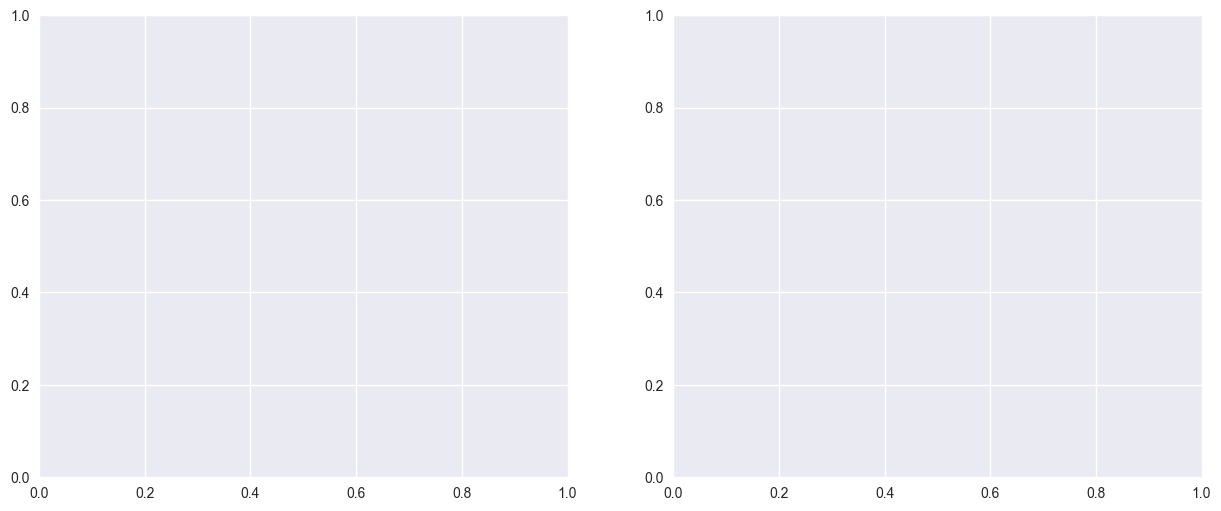

In [28]:
# Visualização da distribuição de classes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
class_counts = df['Class'].value_counts()
axes[0].bar(['Normal (0)', 'Fraude (1)'], class_counts.values, 
           color=['lightblue', 'salmon'], alpha=0.7)
axes[0].set_title('Distribuição de Classes', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Número de Transações')

# Adicionar valores nas barras
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pizza
fraud_pct = df['Class'].mean() * 100
normal_pct = 100 - fraud_pct
axes[1].pie([normal_pct, fraud_pct], 
           labels=[f'Normal ({normal_pct:.1f}%)', f'Fraude ({fraud_pct:.1f}%)'],
           colors=['lightblue', 'salmon'], 
           autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporção de Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"⚠️  Dataset altamente desbalanceado: {fraud_pct:.2f}% de fraudes")


## 💰 Análise da Variável Amount


In [10]:
# Estatísticas descritivas do Amount
print("💰 Estatísticas do Amount:")
print(df['Amount'].describe())

# Análise por classe
print("\n📊 Amount por classe:")
amount_by_class = df.groupby('Class')['Amount'].agg(['count', 'mean', 'std', 'min', 'max'])
print(amount_by_class)


💰 Estatísticas do Amount:
count    250000.000000
mean        154.281075
std         103.896214
min           0.492971
25%          77.807549
50%         131.685158
75%         206.283157
max        1164.499810
Name: Amount, dtype: float64

📊 Amount por classe:
        count        mean         std       min          max
Class                                                       
0      239998  153.915674  103.478131  0.502787  1164.499810
1       10002  163.048889  113.119287  0.492971   899.428886


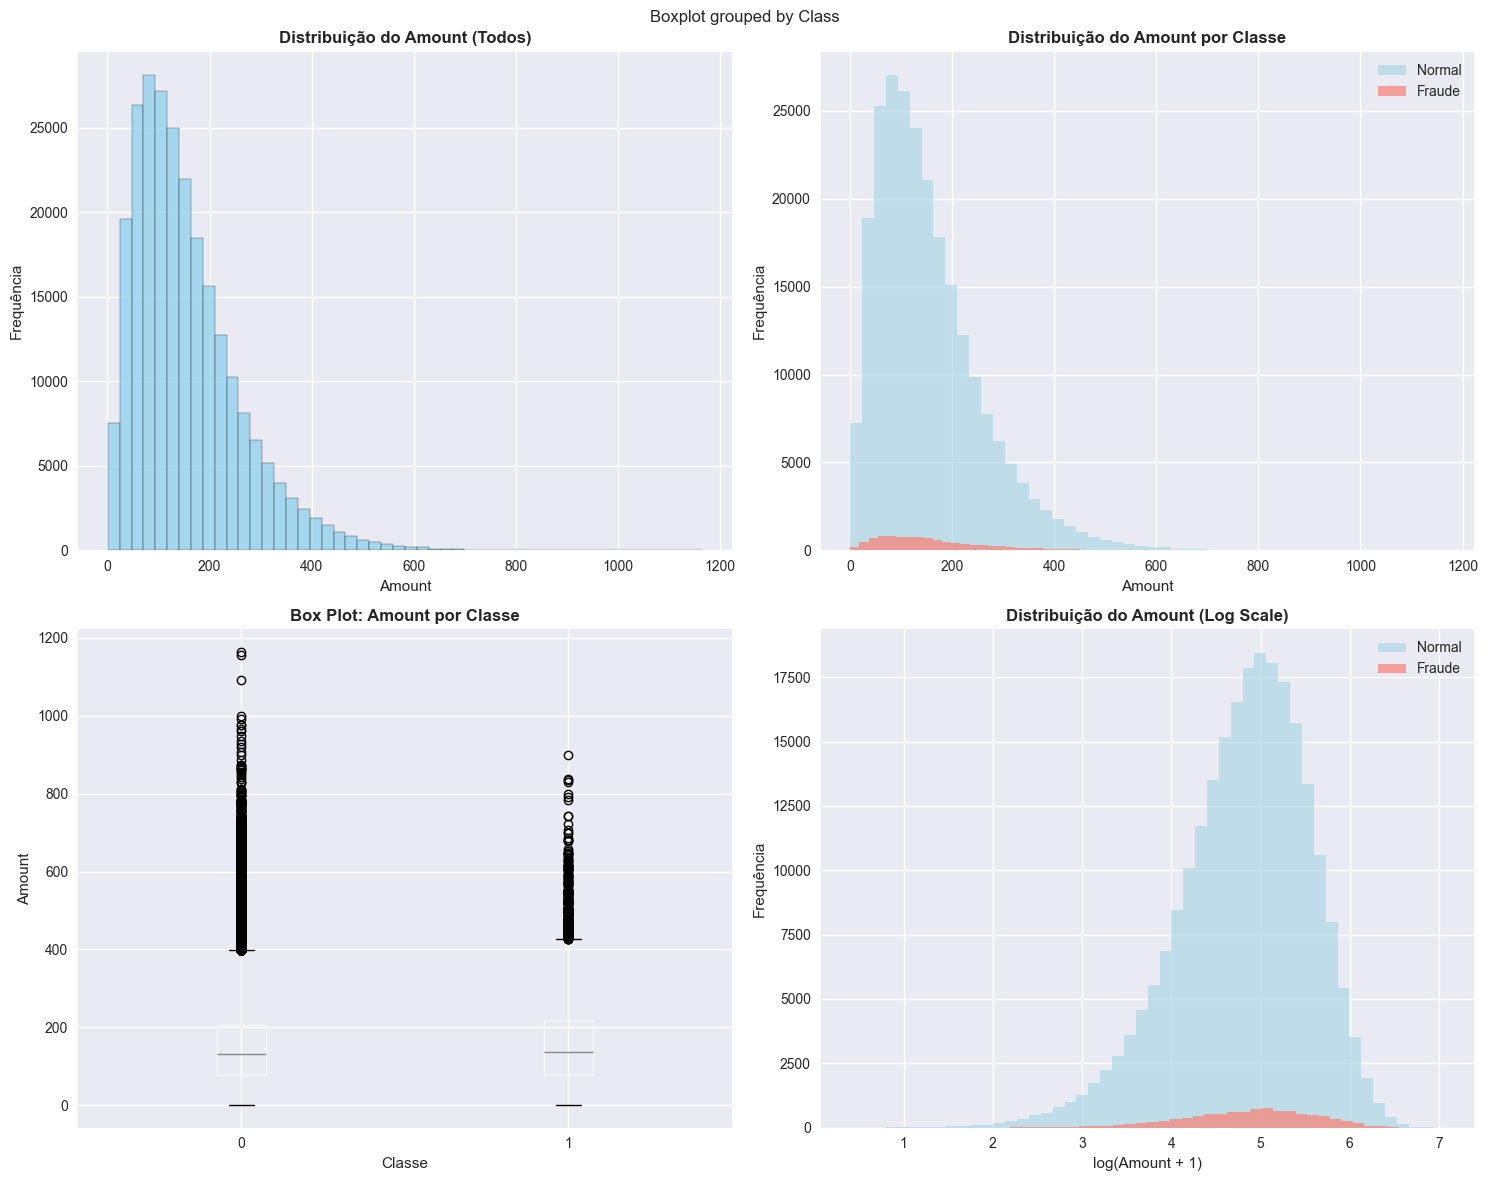

In [11]:
# Visualização da distribuição do Amount
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma geral
axes[0,0].hist(df['Amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuição do Amount (Todos)', fontweight='bold')
axes[0,0].set_xlabel('Amount')
axes[0,0].set_ylabel('Frequência')

# Histograma por classe
normal_amounts = df[df['Class'] == 0]['Amount']
fraud_amounts = df[df['Class'] == 1]['Amount']

axes[0,1].hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='lightblue')
axes[0,1].hist(fraud_amounts, bins=50, alpha=0.7, label='Fraude', color='salmon')
axes[0,1].set_title('Distribuição do Amount por Classe', fontweight='bold')
axes[0,1].set_xlabel('Amount')
axes[0,1].set_ylabel('Frequência')
axes[0,1].legend()

# Box plot
df.boxplot(column='Amount', by='Class', ax=axes[1,0])
axes[1,0].set_title('Box Plot: Amount por Classe', fontweight='bold')
axes[1,0].set_xlabel('Classe')
axes[1,0].set_ylabel('Amount')

# Log scale para melhor visualização
axes[1,1].hist(np.log1p(normal_amounts), bins=50, alpha=0.7, label='Normal', color='lightblue')
axes[1,1].hist(np.log1p(fraud_amounts), bins=50, alpha=0.7, label='Fraude', color='salmon')
axes[1,1].set_title('Distribuição do Amount (Log Scale)', fontweight='bold')
axes[1,1].set_xlabel('log(Amount + 1)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].legend()

plt.tight_layout()
plt.show()


## 🔢 Análise das Features V1-V28


In [13]:
# Selecionar apenas as features V1-V28
v_features = [f'V{i}' for i in range(1, 29)]
df_v = df[v_features]

print("🔢 Estatísticas das Features V1-V28:")
print(f"• Média geral: {df_v.mean().mean():.4f}")
print(f"• Desvio padrão médio: {df_v.std().mean():.4f}")
print(f"• Range médio: {df_v.max().max() - df_v.min().min():.4f}")

# Verificar se há correlação entre features
correlation_matrix = df_v.corr()
print(f"\n📊 Correlação média entre features: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.4f}")


🔢 Estatísticas das Features V1-V28:
• Média geral: 0.0001
• Desvio padrão médio: 0.9997
• Range médio: 10.5330

📊 Correlação média entre features: -0.0000


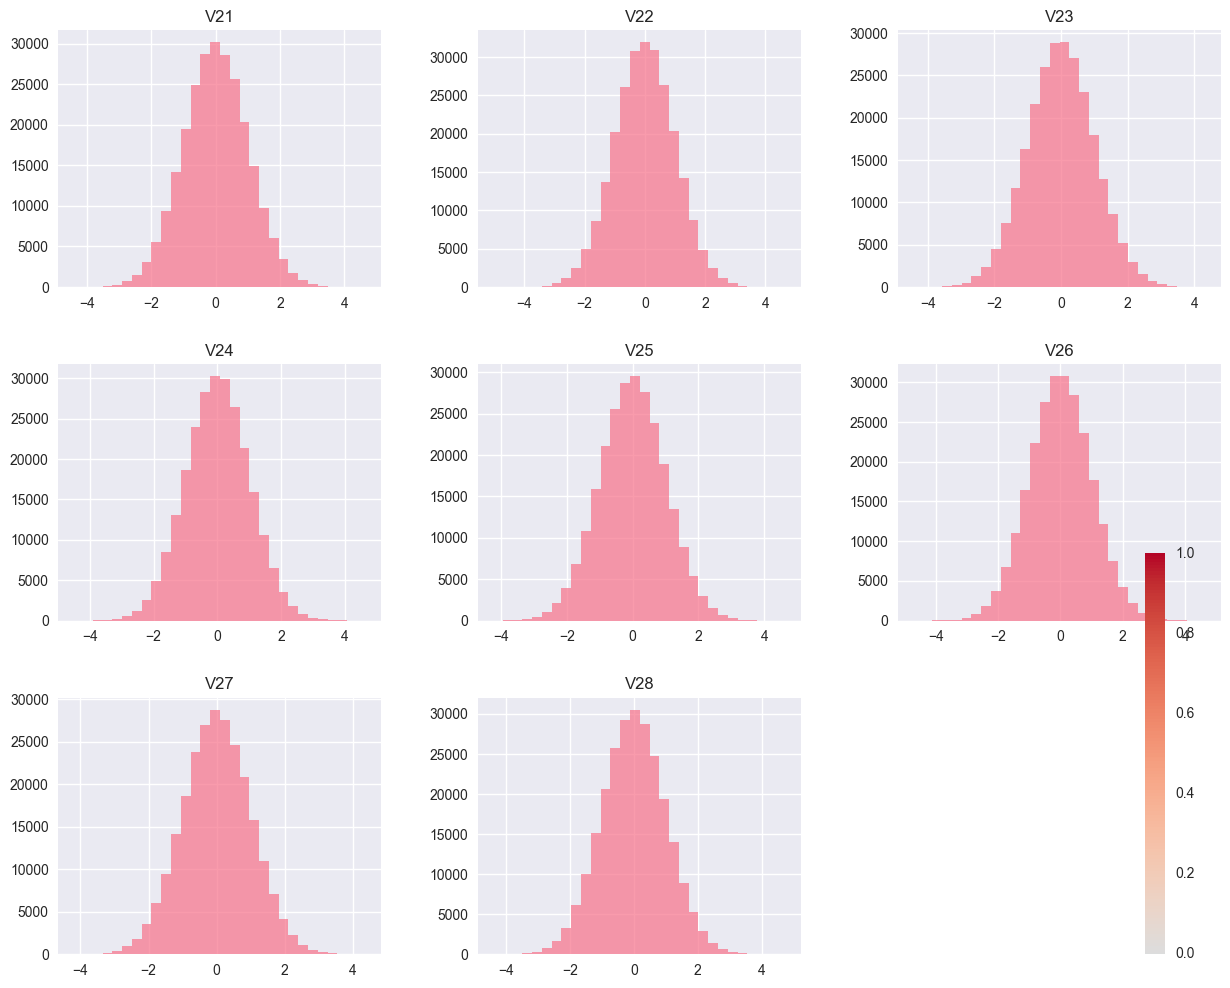

In [14]:
# Visualização das features V1-V28
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribuição das primeiras 8 features
df_v.iloc[:, :8].hist(bins=30, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Distribuição das Features V1-V8', fontweight='bold')

# Distribuição das últimas 8 features
df_v.iloc[:, -8:].hist(bins=30, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Distribuição das Features V21-V28', fontweight='bold')

# Box plot das features por classe (amostra)
sample_features = ['V1', 'V2', 'V3', 'V4', 'V5']
df_sample = df[['Class'] + sample_features]
df_melted = df_sample.melt(id_vars=['Class'], var_name='Feature', value_name='Value')

sns.boxplot(data=df_melted, x='Feature', y='Value', hue='Class', ax=axes[1,0])
axes[1,0].set_title('Box Plot: Features V1-V5 por Classe', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Heatmap de correlação (amostra)
sample_corr = df_v.iloc[:, :10].corr()
sns.heatmap(sample_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Matriz de Correlação (V1-V10)', fontweight='bold')

plt.tight_layout()
plt.show()


## ⏰ Análise Temporal


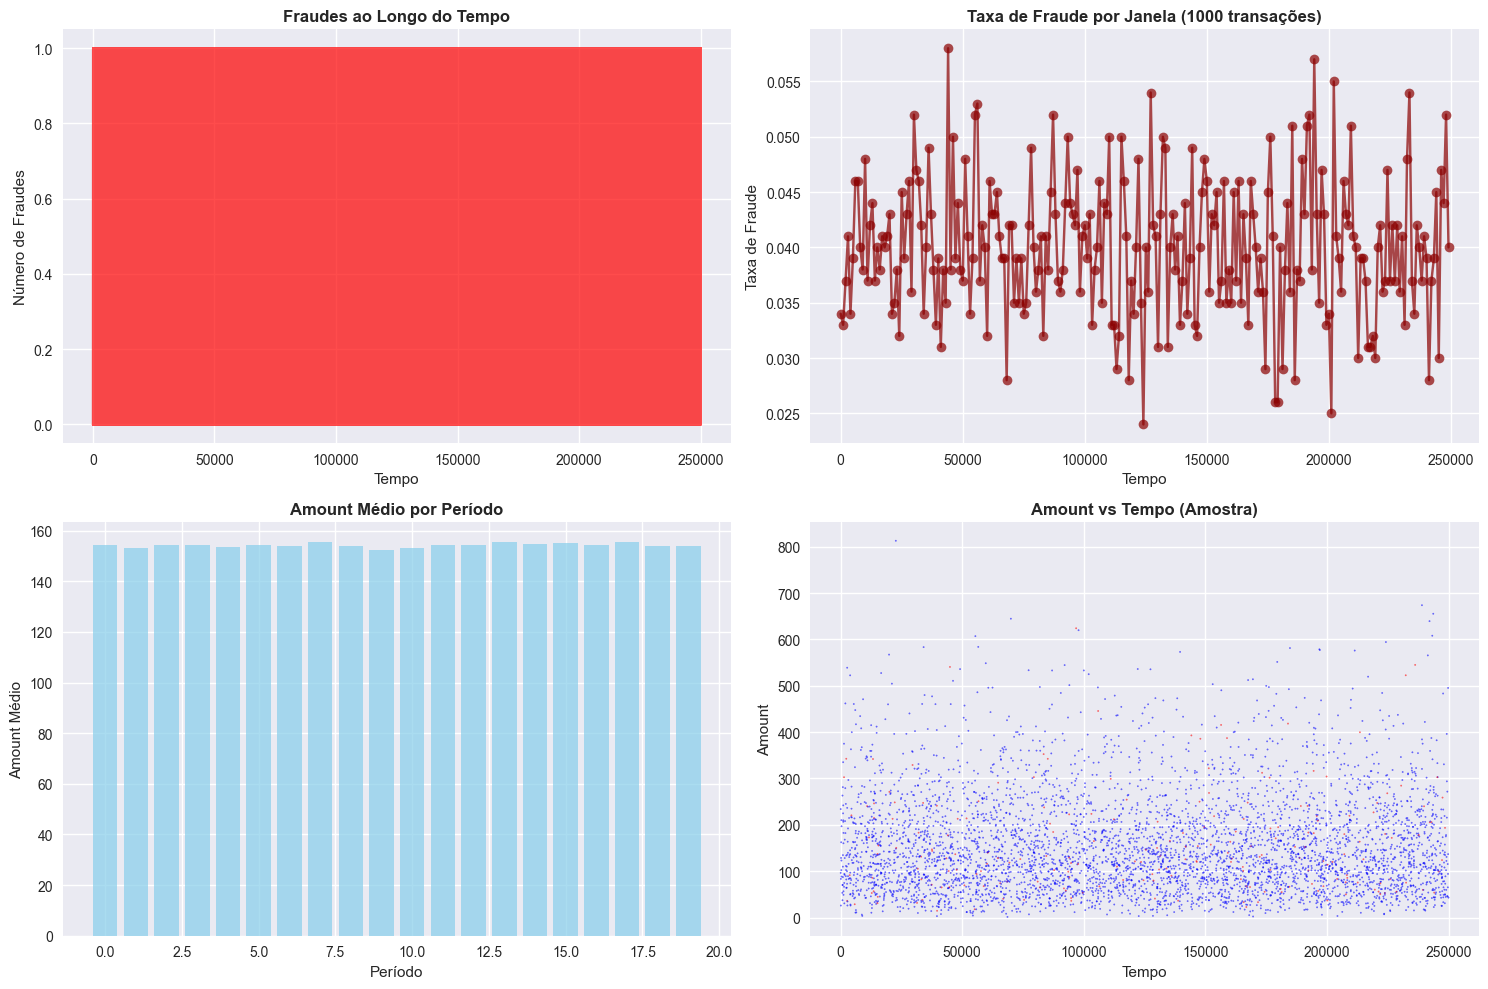

In [15]:
# Análise temporal das fraudes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fraudes ao longo do tempo
fraud_timeline = df.groupby('Time')['Class'].sum()
axes[0,0].plot(fraud_timeline.index, fraud_timeline.values, alpha=0.7, color='red')
axes[0,0].set_title('Fraudes ao Longo do Tempo', fontweight='bold')
axes[0,0].set_xlabel('Tempo')
axes[0,0].set_ylabel('Número de Fraudes')

# Taxa de fraude por janela temporal
window_size = 1000
fraud_rate_timeline = df.groupby(df['Time'] // window_size)['Class'].mean()
axes[0,1].plot(fraud_rate_timeline.index * window_size, fraud_rate_timeline.values, 
               marker='o', alpha=0.7, color='darkred')
axes[0,1].set_title(f'Taxa de Fraude por Janela ({window_size} transações)', fontweight='bold')
axes[0,1].set_xlabel('Tempo')
axes[0,1].set_ylabel('Taxa de Fraude')

# Distribuição de Amount ao longo do tempo
time_bins = pd.cut(df['Time'], bins=20)
amount_by_time = df.groupby(time_bins)['Amount'].mean()
axes[1,0].bar(range(len(amount_by_time)), amount_by_time.values, alpha=0.7, color='skyblue')
axes[1,0].set_title('Amount Médio por Período', fontweight='bold')
axes[1,0].set_xlabel('Período')
axes[1,0].set_ylabel('Amount Médio')

# Scatter plot: Amount vs Time (amostra)
sample_df = df.sample(n=5000, random_state=42)
colors = ['blue' if x == 0 else 'red' for x in sample_df['Class']]
axes[1,1].scatter(sample_df['Time'], sample_df['Amount'], c=colors, alpha=0.5, s=1)
axes[1,1].set_title('Amount vs Tempo (Amostra)', fontweight='bold')
axes[1,1].set_xlabel('Tempo')
axes[1,1].set_ylabel('Amount')

plt.tight_layout()
plt.show()


## 🎯 Análise de Padrões de Fraude


In [16]:
# Comparação entre transações normais e fraudulentas
normal_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

print("🔍 Comparação entre Transações Normais e Fraudulentas:")
print(f"\n📊 Estatísticas do Amount:")
print(f"• Normal - Média: R$ {normal_df['Amount'].mean():.2f}, Mediana: R$ {normal_df['Amount'].median():.2f}")
print(f"• Fraude - Média: R$ {fraud_df['Amount'].mean():.2f}, Mediana: R$ {fraud_df['Amount'].median():.2f}")

print(f"\n🔢 Estatísticas das Features V:")
for i in range(1, 6):  # Primeiras 5 features
    v_col = f'V{i}'
    normal_mean = normal_df[v_col].mean()
    fraud_mean = fraud_df[v_col].mean()
    print(f"• {v_col} - Normal: {normal_mean:.3f}, Fraude: {fraud_mean:.3f}")


🔍 Comparação entre Transações Normais e Fraudulentas:

📊 Estatísticas do Amount:
• Normal - Média: R$ 153.92, Mediana: R$ 131.43
• Fraude - Média: R$ 163.05, Mediana: R$ 137.43

🔢 Estatísticas das Features V:
• V1 - Normal: 0.001, Fraude: 0.018
• V2 - Normal: -0.002, Fraude: -0.041
• V3 - Normal: 0.004, Fraude: -0.014
• V4 - Normal: -0.005, Fraude: 0.001
• V5 - Normal: -0.000, Fraude: 0.004


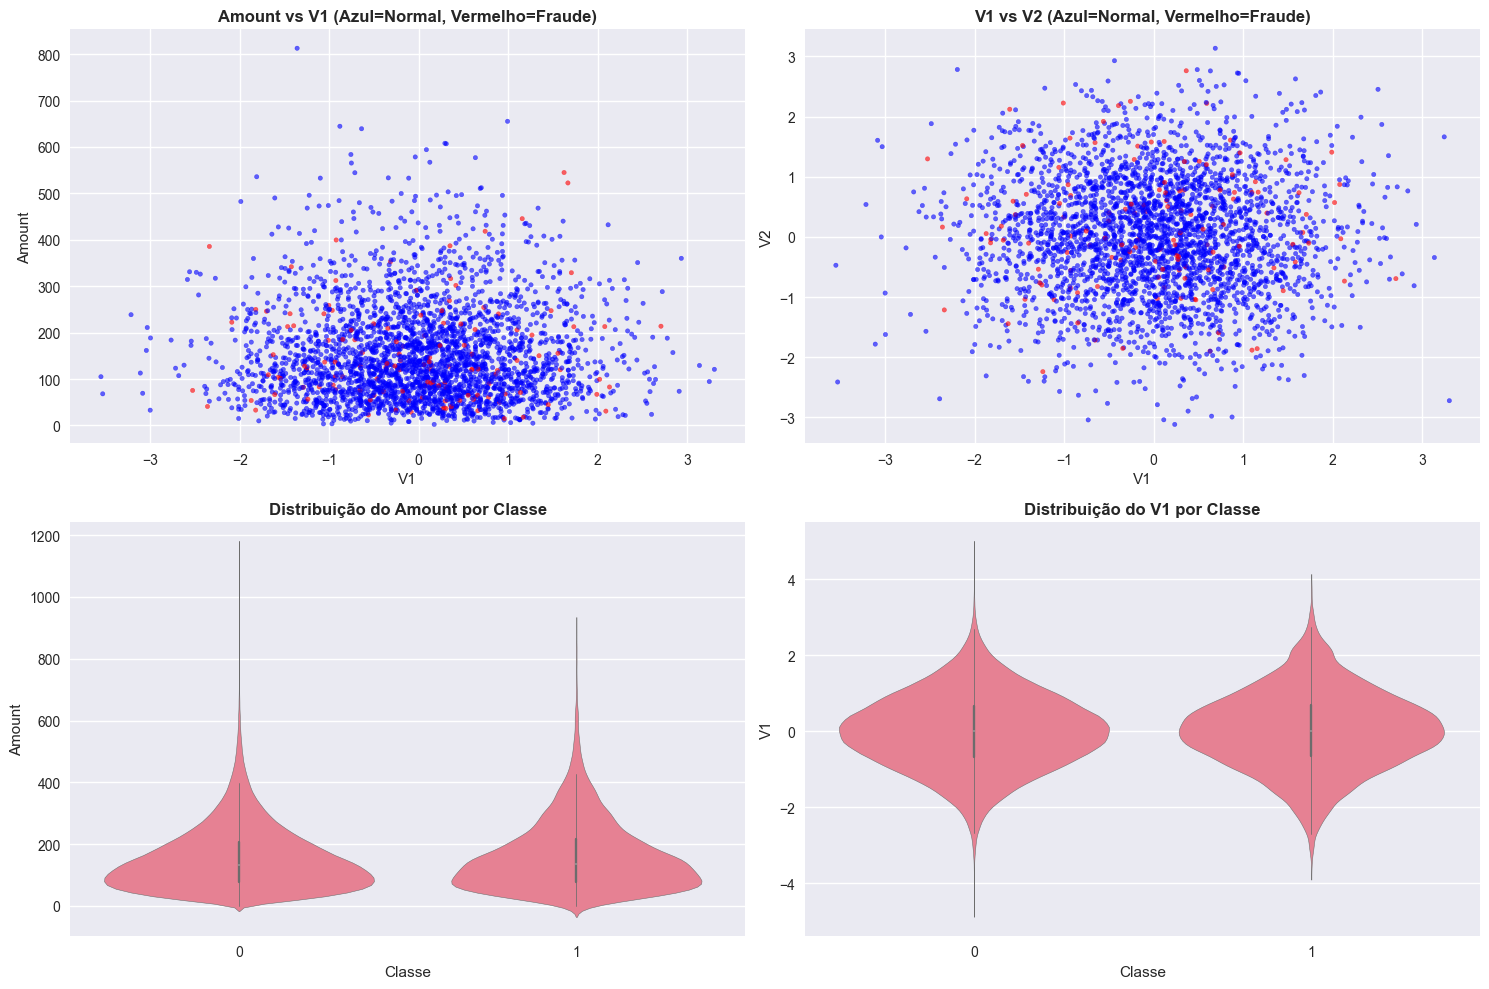

In [17]:
# Visualização de padrões de fraude
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount vs V1 (colored by class)
sample_df = df.sample(n=3000, random_state=42)
colors = ['blue' if x == 0 else 'red' for x in sample_df['Class']]
axes[0,0].scatter(sample_df['V1'], sample_df['Amount'], c=colors, alpha=0.6, s=10)
axes[0,0].set_title('Amount vs V1 (Azul=Normal, Vermelho=Fraude)', fontweight='bold')
axes[0,0].set_xlabel('V1')
axes[0,0].set_ylabel('Amount')

# V1 vs V2 (colored by class)
axes[0,1].scatter(sample_df['V1'], sample_df['V2'], c=colors, alpha=0.6, s=10)
axes[0,1].set_title('V1 vs V2 (Azul=Normal, Vermelho=Fraude)', fontweight='bold')
axes[0,1].set_xlabel('V1')
axes[0,1].set_ylabel('V2')

# Distribuição de Amount por classe (violin plot)
sns.violinplot(data=df, x='Class', y='Amount', ax=axes[1,0])
axes[1,0].set_title('Distribuição do Amount por Classe', fontweight='bold')
axes[1,0].set_xlabel('Classe')
axes[1,0].set_ylabel('Amount')

# Distribuição de V1 por classe
sns.violinplot(data=df, x='Class', y='V1', ax=axes[1,1])
axes[1,1].set_title('Distribuição do V1 por Classe', fontweight='bold')
axes[1,1].set_xlabel('Classe')
axes[1,1].set_ylabel('V1')

plt.tight_layout()
plt.show()


## 📊 Resumo e Insights


In [18]:
# Resumo final
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 50)

print(f"\n📊 Dataset:")
print(f"• Total de transações: {len(df):,}")
print(f"• Período temporal: {df['Time'].min()} a {df['Time'].max()}")
print(f"• Taxa de fraude: {df['Class'].mean():.3%}")
print(f"• Valor médio das transações: R$ {df['Amount'].mean():.2f}")

print(f"\n💰 Amount:")
print(f"• Range: R$ {df['Amount'].min():.2f} a R$ {df['Amount'].max():.2f}")
print(f"• Desvio padrão: R$ {df['Amount'].std():.2f}")
print(f"• Mediana: R$ {df['Amount'].median():.2f}")

print(f"\n🔢 Features V1-V28:")
print(f"• Distribuição: Normal (média ≈ 0, std ≈ 1)")
print(f"• Correlação média: {df[v_features].corr().values[np.triu_indices_from(df[v_features].corr().values, k=1)].mean():.4f}")

print(f"\n🎯 Padrões de Fraude:")
print(f"• Amount médio (fraude): R$ {fraud_df['Amount'].mean():.2f}")
print(f"• Amount médio (normal): R$ {normal_df['Amount'].mean():.2f}")
print(f"• Diferença: {((fraud_df['Amount'].mean() - normal_df['Amount'].mean()) / normal_df['Amount'].mean() * 100):+.1f}%")

print(f"\n⚠️  Desafios:")
print(f"• Dataset altamente desbalanceado ({df['Class'].mean():.3%} de fraudes)")
print(f"• Necessário usar métricas adequadas (AUPRC, Precision@K)")
print(f"• Features V1-V28 são anonimizadas (PCA-like)")

print(f"\n✅ Próximos Passos:")
print(f"• Implementar features mais sofisticadas")
print(f"• Testar diferentes algoritmos (XGBoost, IsolationForest, Autoencoder)")
print(f"• Otimizar threshold baseado em custo")
print(f"• Implementar monitoramento de drift")


📋 RESUMO DA ANÁLISE EXPLORATÓRIA

📊 Dataset:
• Total de transações: 250,000
• Período temporal: 0 a 249999
• Taxa de fraude: 4.001%
• Valor médio das transações: R$ 154.28

💰 Amount:
• Range: R$ 0.49 a R$ 1164.50
• Desvio padrão: R$ 103.90
• Mediana: R$ 131.69

🔢 Features V1-V28:
• Distribuição: Normal (média ≈ 0, std ≈ 1)
• Correlação média: -0.0000

🎯 Padrões de Fraude:
• Amount médio (fraude): R$ 163.05
• Amount médio (normal): R$ 153.92
• Diferença: +5.9%

⚠️  Desafios:
• Dataset altamente desbalanceado (4.001% de fraudes)
• Necessário usar métricas adequadas (AUPRC, Precision@K)
• Features V1-V28 são anonimizadas (PCA-like)

✅ Próximos Passos:
• Implementar features mais sofisticadas
• Testar diferentes algoritmos (XGBoost, IsolationForest, Autoencoder)
• Otimizar threshold baseado em custo
• Implementar monitoramento de drift


## 🔧 Features Engineering Sugeridas

Baseado na análise, aqui estão algumas features que podem melhorar a performance do modelo:


In [19]:
# Exemplo de features engineering
def create_advanced_features(df):
    """
    Cria features mais sofisticadas baseadas na análise exploratória
    """
    df_feat = df.copy()
    
    # Features de Amount
    df_feat['Amount_log'] = np.log1p(df_feat['Amount'])
    df_feat['Amount_sqrt'] = np.sqrt(df_feat['Amount'])
    df_feat['Amount_zscore'] = (df_feat['Amount'] - df_feat['Amount'].mean()) / df_feat['Amount'].std()
    
    # Features de interação
    df_feat['V1_V2_interaction'] = df_feat['V1'] * df_feat['V2']
    df_feat['Amount_V1_interaction'] = df_feat['Amount'] * df_feat['V1']
    
    # Features estatísticas das V features
    v_cols = [f'V{i}' for i in range(1, 29)]
    df_feat['V_sum'] = df_feat[v_cols].sum(axis=1)
    df_feat['V_mean'] = df_feat[v_cols].mean(axis=1)
    df_feat['V_std'] = df_feat[v_cols].std(axis=1)
    df_feat['V_max'] = df_feat[v_cols].max(axis=1)
    df_feat['V_min'] = df_feat[v_cols].min(axis=1)
    
    # Features temporais (simuladas)
    df_feat['hour'] = df_feat['Time'] % 24
    df_feat['day'] = df_feat['Time'] // 24
    df_feat['is_weekend'] = (df_feat['day'] % 7).isin([5, 6]).astype(int)
    
    return df_feat

# Aplicar features engineering
df_enhanced = create_advanced_features(df)

print("🔧 Features Engineering Aplicado:")
print(f"• Features originais: {df.shape[1]}")
print(f"• Features após engineering: {df_enhanced.shape[1]}")
print(f"• Novas features: {df_enhanced.shape[1] - df.shape[1]}")

print("\n📊 Novas features criadas:")
new_features = [col for col in df_enhanced.columns if col not in df.columns]
for feat in new_features:
    print(f"• {feat}")


🔧 Features Engineering Aplicado:
• Features originais: 35
• Features após engineering: 48
• Novas features: 13

📊 Novas features criadas:
• Amount_log
• Amount_sqrt
• Amount_zscore
• V1_V2_interaction
• Amount_V1_interaction
• V_sum
• V_mean
• V_std
• V_max
• V_min
• hour
• day
• is_weekend
